## import

In [39]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [40]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 3 Solve the Rigde regression problem and examine Bias and Variance for Ridge:

> (a) Derive (using pen and paper) the ridge regression solution by, as you would when minimizing any differentiable analytical function, differentiating $∥{\bf y} − {\bf X}β∥ + ∥β∥_2$ with respect to $β$, setting to zero and solving for $β$. That is, solve
$\frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2]= 0$ for $β$.

> (b) Compute ridge-regression solutions for the diabetes data set for 100 values of the regularization parameter in the range $10^{−4}$ to $10^3$. Plot the solutions as a function of this parameter. In the next lecture you will learn how to choose a single parameter value which suits the problem at hand.

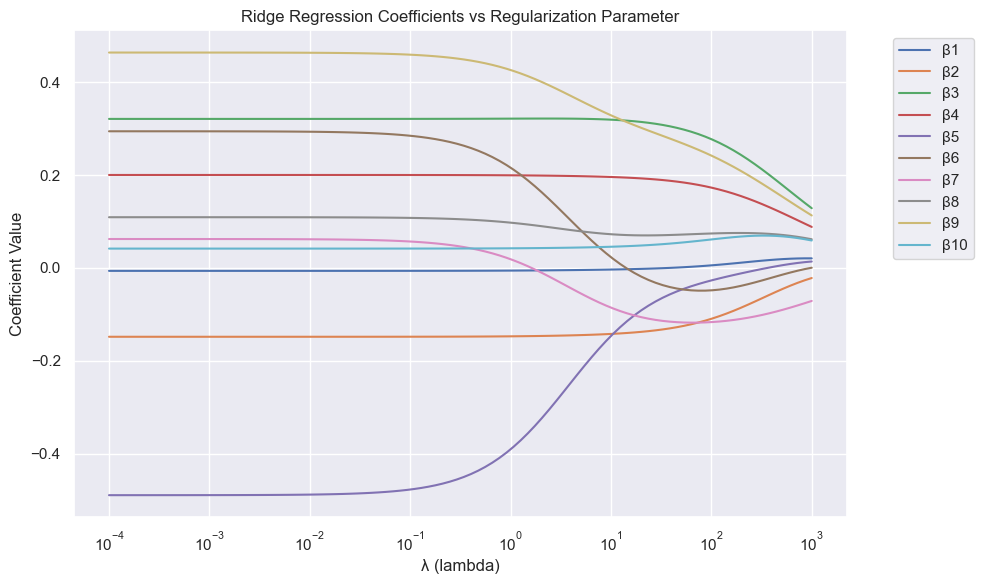

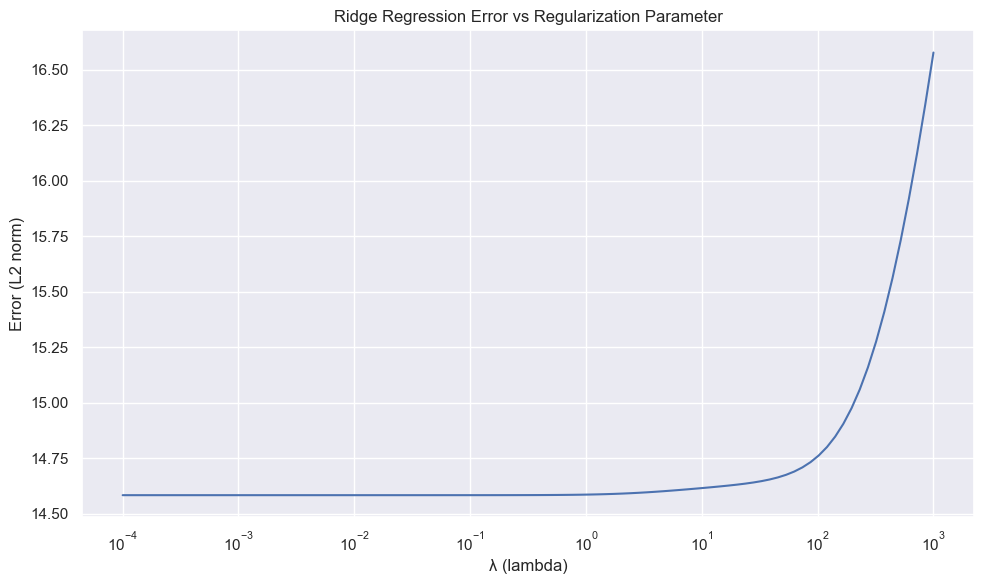

Lambda value with minimum error: 0.0001


In [41]:
# Create a method that computes the betas in ridge regression analytically
# given the design matrix, lambdas, number of independent variables
# and dependent values
def ridgeMulti(X, _lambda, p, y):
    betas = np.linalg.inv(X.T @ X + _lambda * np.eye(p)) @ X.T @ y
    error = np.linalg.norm(y - X @ betas)

    return betas, error

# make list of lambda values. 
lambdas = np.logspace(-4, 3, 100)

# run ridge for all lambda values
betas, errors = zip(*[ridgeMulti(X, _lambda, p, y) for _lambda in lambdas])

# plot results
plt.figure(figsize=(10,6))
for i in range(p):
    plt.plot(lambdas, [beta[i] for beta in betas], label=f'β{i+1}')
plt.xscale('log')
plt.xlabel('λ (lambda)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs Regularization Parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the error vs lambda
plt.figure(figsize=(10,6))
plt.plot(lambdas, errors, '-')
plt.xscale('log')
plt.xlabel('λ (lambda)')
plt.ylabel('Error (L2 norm)')
plt.title('Ridge Regression Error vs Regularization Parameter')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find lambda with minimum error
min_error_idx = np.argmin(errors)
min_error_lambda = lambdas[min_error_idx]
print(f"Lambda value with minimum error: {min_error_lambda:.4f}")

How does the parameter estimates change when the regularization parameter increase?

What does this mean in terms of the bias of the model?


> (c) Change the experiment in exercise 2 to investigate bias and variance for ridge regression instead of OLS. Can you lower the variance without introducing too much bias?

In [42]:
# recreate the experiment from the last exercise
# you can reuse the code with some edits, and do similar plots to investigate
# the bias and variance of ridge

def estimate_betas(X, beta_true, sigma, _lambda):
    """

    Parameters:
    X (nXp matrix): feature matrix used for simulation
    true_betas (array): array of ture betas
    sigma (float): The noise level in the simulation
    _lambda (float): The trade-off parameter for ridge regression

    Returns:
    beta: the estimated betas

   """
    # Simulate observed data using the created feature matrix
    epsilon = np.random.normal(0, sigma, size=X.shape[0])
    y = X @ beta_true + epsilon
    
    # Estimate beta using ridge regression formula
    beta = np.linalg.inv(X.T @ X + _lambda * np.eye(p)) @ X.T @ y
    error = np.linalg.norm(y - X @ beta)
    
    return beta, error
    

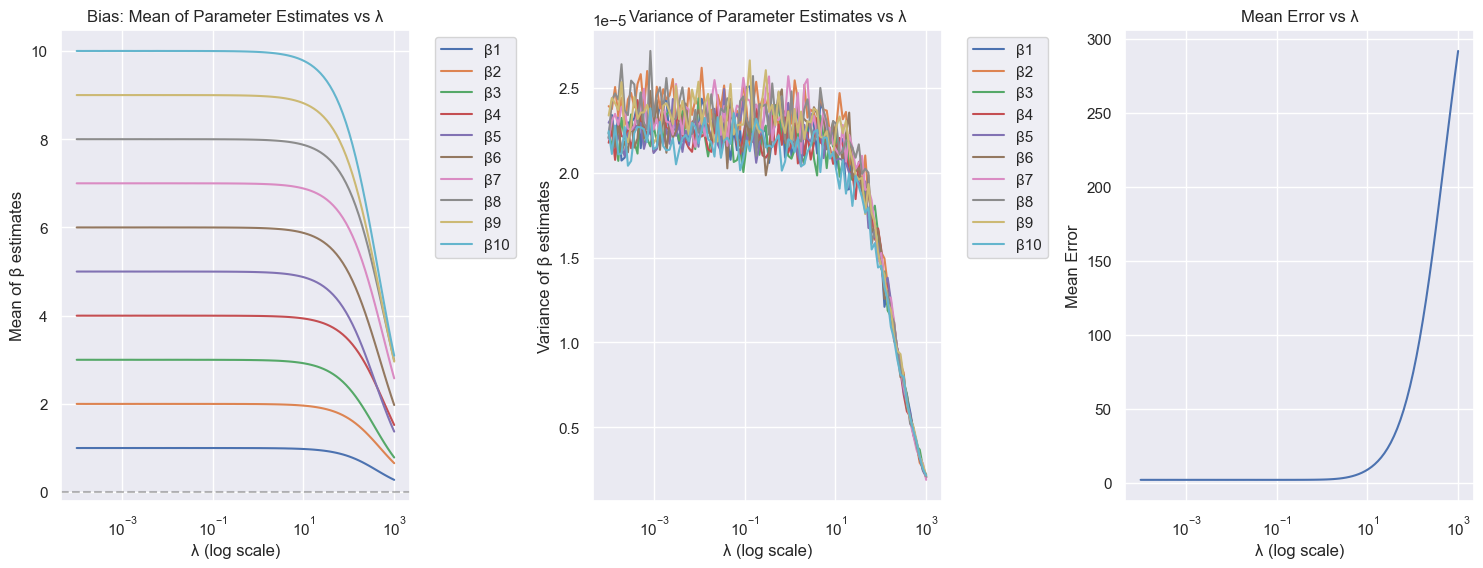

In [43]:
# define true betas, n and p, and sigma
beta_true = np.array([i + 1 for i in range(10)])
sigma = 0.1

# Create a feature matrix
X = np.random.normal(0, 1, size=(n, p))

m = 1000  # number of experiments

# call the method 100 times and save the estimated betas
betas = []
errors = []
for i, _lambda in enumerate(lambdas):
    betas.append([])
    errors.append([])
    for _ in range(m):
        beta, error = estimate_betas(X, beta_true, sigma, _lambda)
        betas[i].append(beta)
        errors[i].append(error)

# Convert to numpy array for easier calculations
betas = np.array(betas)

# Calculate mean and variance across experiments for each lambda
beta_means = np.mean(betas, axis=1)
beta_vars = np.var(betas, axis=1)
error_means = np.mean(errors, axis=1)

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot mean estimates for each parameter
for j in range(p):
    ax1.plot(lambdas, beta_means[:, j], label=f'β{j+1}')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xscale('log')
ax1.set_xlabel('λ (log scale)')
ax1.set_ylabel('Mean of β estimates')
ax1.set_title('Bias: Mean of Parameter Estimates vs λ')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot variance of estimates for each parameter
for j in range(p):
    ax2.plot(lambdas, beta_vars[:, j], label=f'β{j+1}')
ax2.set_xscale('log')
ax2.set_xlabel('λ (log scale)')
ax2.set_ylabel('Variance of β estimates')
ax2.set_title('Variance of Parameter Estimates vs λ')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot mean error vs lambda
ax3.plot(lambdas, error_means)
ax3.set_xscale('log')
ax3.set_xlabel('λ (log scale)')
ax3.set_ylabel('Mean Error')
ax3.set_title('Mean Error vs λ')

plt.tight_layout()
plt.show()


What happens with the bias and variance as the regularization parameter increase?